In [1]:
# Friedman test is alternative to one way anova for dependent samples.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('friedman.csv')
df

,id,time,score
0,1,t1,4.005027
1,2,t1,2.558124
2,3,t1,3.244241
3,4,t1,3.419538
4,5,t1,2.871243
5,6,t1,2.045868
6,7,t1,3.525992
7,8,t1,3.179425
8,9,t1,3.507964
9,10,t1,3.043798


## Summary Statistics

In [4]:
stats = df.groupby('time')['score'].agg(['count', 'std', 'mean'])
stats

,count,std,mean
time,,,
t1,10,0.551806,3.140122
t2,10,0.863070,4.933942
t3,10,1.142598,7.636342


## Visualization

<AxesSubplot:xlabel='time', ylabel='score'>

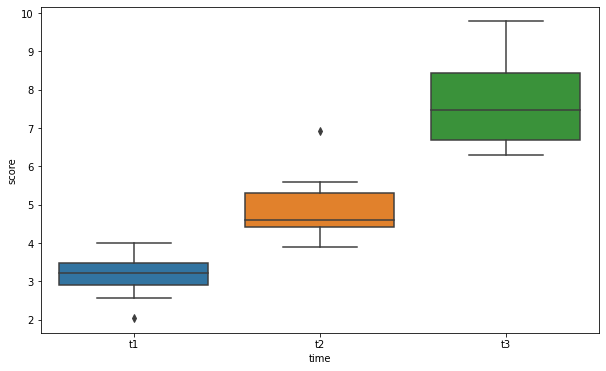

In [5]:
#Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="time", y="score", data=df)
ax

## Computation

In [6]:
import pingouin as pg
pg.friedman(data=df, dv="score", within="time", subject="id")

,Source,W,ddof1,Q,p-unc
Friedman,time,0.91,2,18.2,0.000112


## Effect size

In [7]:
t1 = df['score'][df['time']=='t1']
t2 = df['score'][df['time']=='t2']
t3 = df['score'][df['time']=='t3']

In [8]:
data = [t1, t2, t3]

In [9]:
import scipy
friedmanchisquare = scipy.stats.mstats.friedmanchisquare(data)
friedmanchisquare

FriedmanchisquareResult(statistic=18.2, pvalue=0.00011166580849011483)

In [10]:
df['time'].unique()

array(['t1', 't2', 't3'], dtype=object)

In [11]:
n = len(df['score'][df['time']=='t1'])
k = len(df['time'].unique())
Q = friedmanchisquare[0]
n,k,Q

(10, 3, 18.2)

In [12]:
#### Kendall's W

In [13]:
W = Q/(n*(k-1))
W

0.9099999999999999

## Interaction Plot

<AxesSubplot:xlabel='time', ylabel='score'>

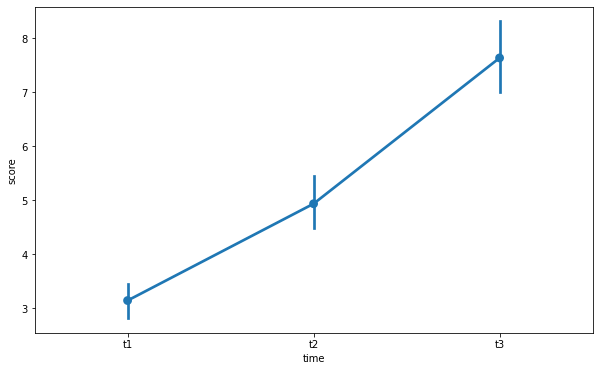

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.pointplot(x="time", y="score", data=df, order=["t1", "t2", "t3"])
ax

## Pairwise Comparisons

In [15]:
t1 = df['score'][df['time']=='t1']
t2 = df['score'][df['time']=='t2']
t3 = df['score'][df['time']=='t3']

In [16]:
data = [t1, t2, t3]

#### Pairwise comparisons using paired Wilcoxon signed-rank test.

In [17]:
#perform Wilcoxon's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
sp.posthoc_wilcoxon(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.005859,0.005859
2,0.005859,1.000000,0.011719
3,0.005859,0.011719,1.000000


## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

t1 vs. t2: Custom statistical test, P_val:5.859e-03
t2 vs. t3: Custom statistical test, P_val:1.172e-02
t1 vs. t3: Custom statistical test, P_val:5.859e-03


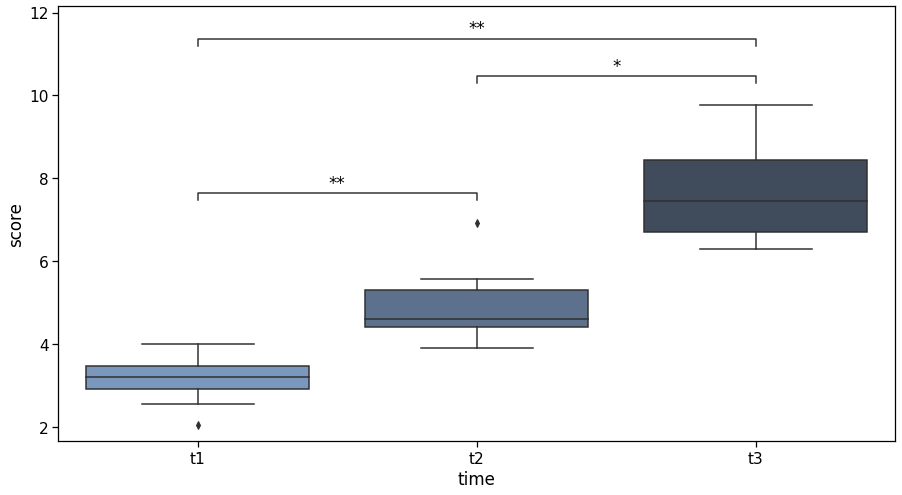

In [18]:
from statannotations.Annotator import Annotator

pvalues = [0.005859, 0.005859, 0.011719]

subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    df,
    'x':       'time',
    'y':       'score',
    'palette': subcat_palette[1:]
}

pairs = [('t1', 't2'),
         ('t1', 't3'),
         ('t2', 't3')]

with sns.plotting_context('notebook', font_scale = 1.4):
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))

    # Plot with seaborn
    ax=sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    plt.show()